In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_excel("C:\\Users\\darre\\Downloads\\bikedata2.xlsx")
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


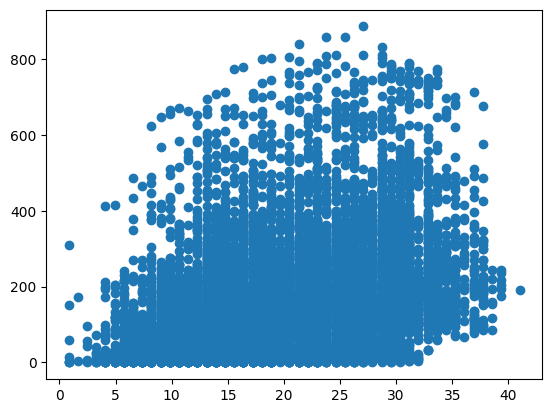

In [11]:
# dont need to clean, it is a clean dataset. first we need to evaluate relationships then

plt.scatter(data['temp'], data['registered'])
# sort of a relationship, not great though
# washington has mild weather, so ppl could be riding a bike year round

In [12]:
# build a simple model

# first identify variable
# using casual cuz might be easier to see relationship

x = data['temp']
y = data['casual']

In [13]:
# build model

results = ols("casual ~ temp", data=data).fit()
# this is a statsmodel, so there isn't a notion of training and testing, we just train
print(results.summary())
# r^2 is low, temp explains about 21% of the variability in casual bike rentals (rough overview)
# top section is overall model effectiveness
# Prob F stat is a statistical test, tells us whether this model is statistically from null hypoth (no relation). There is a difference.
# bottom section is about individual variables in model
# shows the y-int, it is negative for us, not surprising given the low r^2
# temp is slope, for every extra degree in temp, we rent about 3 times as many bikes 
# standard error is +/- of that value
# p value is telling us about statistical significance, we want it less than 0.05
# add in humidity, it will have a negative slope since it reduces ppl being outside
# ols("casual ~ temp + humidity")

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3037.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:32:03   Log-Likelihood:                -56684.
No. Observations:               10886   AIC:                         1.134e+05
Df Residuals:                   10884   BIC:                         1.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5710      1.178    -20.855      0.0

In [18]:
# add a categorical variable (dummy variable format)

results = ols("casual ~ temp + humidity + workingday", data=data).fit()
# this is a statsmodel, so there isn't a notion of training and testing, we just train
print(results.summary())
# r^2 gets bigger, adding more variables makes it bigger 
# no MSE or RMSE present, we can use predict()
pred_vals = results.predict(data[['temp', 'humidity', 'workingday']])
res = pd.concat([pred_vals.to_frame().rename(columns={0:'yhat'}),data['casual']], axis=1)
res['error'] = res['yhat'] - res['casual']
print(res.head())
# yhat = 53.1426 + 2.9temp -0.8humididty - 36workingday

# this is what predict func does for every value, calculates what the model would've predicted
yhat = 53.1426 + 2.9 * 9.84 -0.8 * 81 - 36 * 0
print(yhat)

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:50:18   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

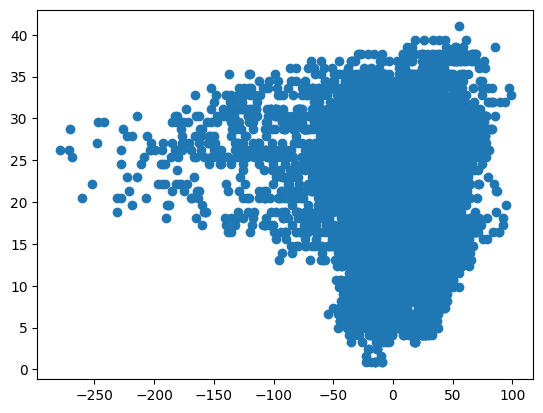

In [19]:
plt.scatter(res['error'], data['temp'])